<a href="https://colab.research.google.com/github/wilyouandaogo70/Demorepo/blob/main/Wily_Ouandaogo_4_2_ML_Linear_Regression_Guided_Project_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Linear Regression on Boston Housing Dataset

## Data Background and Problem Statement

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

# Task 1 : Environment Set up

In [ ]:
#import required libraries
import numpy as np
import pandas as pd

# Task 2 : Data Collection

In [ ]:
# import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston_dataset.DESCR)

In [ ]:
# create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names

df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
# append Price, target, as a new columnn to the dataset
df_boston['Price'] = boston_dataset.target

In [ ]:
# print top 5 observations
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

In [ ]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


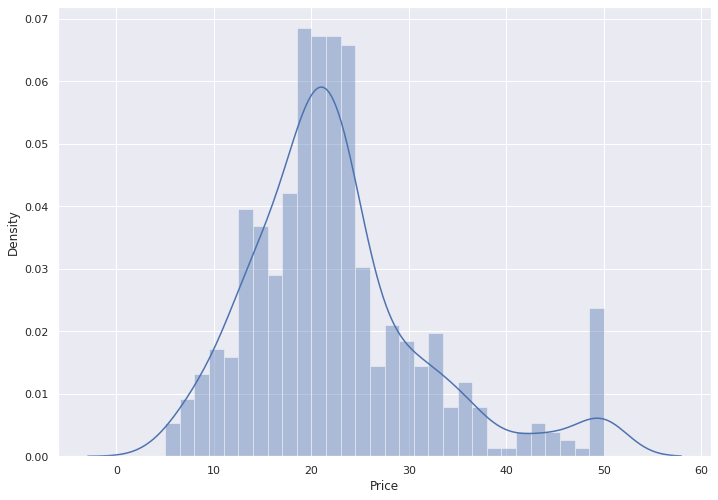

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_boston['Price'], bins=30)
plt.show()

#  Create a correlation matrix that measures the linear relationships between the variables

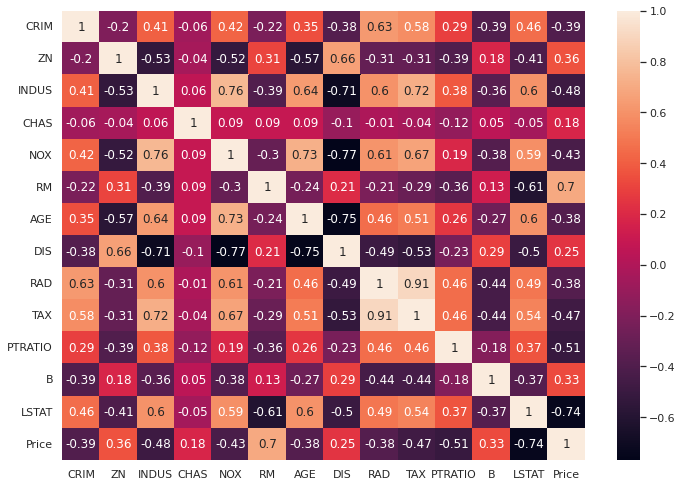

In [ ]:
correlation_matrix = df_boston.corr().round(2)
# round(2) rounds values to two places
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Write Your Observations

The first observation I have made looking at this correlation matrix is the diagonal with the highest probabilities, which are the probabilities of each element. 

I have observed that the probability between DIS and NOX is negative of -0.77

I have also seen that the probability between Tax and RAD is 0.91 which is one of the highest positive probabilities.

# Preparing the data for training the Machine Learning Model

In [ ]:
# assign features on X axis (all columns except price)
X_features = boston_dataset.data

In [ ]:
# assign target on Y axis (price)
Y_target = boston_dataset.target

# Build Linear Regression Model

In [ ]:
# import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [ ]:
# fit data into the the estimator, which does the training
lineReg.fit(X_features,Y_target)

In [ ]:
# print the intercept 
print('the estimated intercept %.2f '%lineReg.intercept_)

In [ ]:
# print the coefficient 
print('the coefficient is %d ' %len(lineReg.coef_))

# Model Training

In [ ]:
# train model split the whole dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target)

In [ ]:
# print the dataset shape
print(boston_dataset.data.shape)

In [ ]:
# Print shapes of the training and testing data sets
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [ ]:
# fit the training sets into the model
lineReg.fit(X_train,Y_train)

# Caluclate RMSE and R Square:


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# model evaluation for testing set

y_test_predict = lineReg.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

# Your Conclusion 

In conclusion, we learned that linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The linear regression focuses on continuous numeric data.